In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
df=pd.read_csv('NYCTaxiFares.csv')

In [3]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1
...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1


In [4]:
def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c)
    return d

In [5]:
df['kilometers']=haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilometers
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [6]:
df['EDTTime']=pd.to_datetime(df['pickup_datetime'].str[:19])-pd.Timedelta(hours=4)

In [7]:
df['Hour']=df['EDTTime'].dt.hour

In [8]:
df['AmOrPm']=np.where(df['Hour']>12,'pm','am')

In [9]:
df['Weekday']=df['EDTTime'].dt.weekday

In [10]:
df['Weekday']

0         0
1         5
2         5
3         6
4         4
         ..
119995    6
119996    4
119997    6
119998    1
119999    5
Name: Weekday, Length: 120000, dtype: int64

In [11]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilometers,EDTTime,Hour,AmOrPm,Weekday
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,am,0
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,am,5
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,am,5
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,pm,6
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,pm,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,5.751348,2010-04-18 10:33:03,10,am,6
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,5.767444,2010-04-23 06:27:48,6,am,4
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,5.052523,2010-04-18 14:50:40,14,pm,6
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,1.208923,2010-04-13 04:14:44,4,am,1


In [12]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'kilometers', 'EDTTime', 'Hour', 'AmOrPm',
       'Weekday'],
      dtype='object')

In [13]:
cats=['AmOrPm','Hour']
conts=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','kilometers','Weekday']

In [105]:
y_col=['fare_class']

In [15]:
for col in cats:
    df[col]=df[col].astype('category')

In [16]:
df['Weekday']=df['Weekday'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   pickup_datetime    120000 non-null  object        
 1   fare_amount        120000 non-null  float64       
 2   fare_class         120000 non-null  int64         
 3   pickup_longitude   120000 non-null  float64       
 4   pickup_latitude    120000 non-null  float64       
 5   dropoff_longitude  120000 non-null  float64       
 6   dropoff_latitude   120000 non-null  float64       
 7   passenger_count    120000 non-null  int64         
 8   kilometers         120000 non-null  float64       
 9   EDTTime            120000 non-null  datetime64[ns]
 10  Hour               120000 non-null  category      
 11  AmOrPm             120000 non-null  category      
 12  Weekday            120000 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(6

In [17]:
Hour=df['Hour'].cat.codes

In [18]:
hour=Hour.values

In [19]:
hour

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [20]:
ampm=df['AmOrPm'].cat.codes

In [21]:
ampm=ampm.values

In [83]:
vb=np.stack([ampm,hour],1)

In [84]:
vb=torch.tensor(vb,dtype=torch.int)

In [85]:
vb

tensor([[ 0,  4],
        [ 0, 11],
        [ 0,  7],
        ...,
        [ 1, 14],
        [ 0,  4],
        [ 0, 12]], dtype=torch.int32)

In [25]:
conts=[df[cols].values for cols in conts]

In [26]:
conts=np.stack(conts,1)

In [27]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  , ...,   1.        ,
          2.12631159,   0.        ],
       [-73.990078  ,  40.740558  , -73.974232  , ...,   1.        ,
          1.39230687,   5.        ],
       [-73.994149  ,  40.751118  , -73.960064  , ...,   2.        ,
          3.32676344,   5.        ],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  , ...,   3.        ,
          5.05252282,   6.        ],
       [-74.004449  ,  40.724529  , -73.992697  , ...,   1.        ,
          1.20892296,   1.        ],
       [-73.955415  ,  40.77192   , -73.967623  , ...,   3.        ,
          1.42739869,   5.        ]])

In [28]:
conts=torch.tensor(conts,dtype=torch.float)

In [29]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  ...,   1.0000,   2.1263,   0.0000],
        [-73.9901,  40.7406, -73.9742,  ...,   1.0000,   1.3923,   5.0000],
        [-73.9941,  40.7511, -73.9601,  ...,   2.0000,   3.3268,   5.0000],
        ...,
        [-73.9886,  40.7498, -74.0115,  ...,   3.0000,   5.0525,   6.0000],
        [-74.0044,  40.7245, -73.9927,  ...,   1.0000,   1.2089,   1.0000],
        [-73.9554,  40.7719, -73.9676,  ...,   3.0000,   1.4274,   5.0000]])

In [106]:
y_col=torch.tensor(df[y_col].values)

In [107]:
y_col=y_col.flatten()

In [108]:
y_col.shape

torch.Size([120000])

In [86]:
self_emb_szs=[len(df[cols].cat.categories) for cols in cats]

In [87]:
self_emb_szs

[2, 24]

In [88]:
self_emb_szs=[(col,min(50,col//2)) for col in self_emb_szs]

In [89]:
self_emb_szs

[(2, 1), (24, 12)]

In [90]:
class Tabular_Model(nn.Module):
    def __init__(self,in_features,out_featurs,embed_szs,layers,p=0.5):
        super().__init__()
        self.embed=nn.ModuleList([nn.Embedding(ni,nf) for (ni,nf) in embed_szs])
        self.drop=nn.Dropout(p)
        self.batchn=nn.BatchNorm1d(in_features)
        embdsz=sum([nf for (ni,nf) in embed_szs])
        n_cont=in_features+embdsz
        layer_list=[]
        for i in layers:
            layer_list.append(nn.Linear(n_cont,i))
            layer_list.append(nn.ReLU(inplace=True))
            layer_list.append(nn.BatchNorm1d(i))
            layer_list.append(nn.Dropout(p))
            n_cont=i
        layer_list.append(nn.Linear(layers[-1],out_featurs))
        self.layers=nn.Sequential(*layer_list)
        
    def forward(self,x_cont,x_cat):
        Embeddings=[]
        for i,e in enumerate(self.embed):
            Embeddings.append(e(x_cat[:,i]))
        x_cat=torch.cat(Embeddings,1)
        x_cat=self.drop(x_cat)
            
        x_cont=self.batchn(x_cont)
        x=torch.cat([x_cont,x_cat],1)
        x=self.layers(x)
        return x
            

In [91]:
torch.manual_seed(33)
model=Tabular_Model(conts.shape[1],2,self_emb_szs,[200,100,50],p=0.4)

In [92]:
y_col.dtype

torch.int32

In [93]:
conts.dtype

torch.float32

In [94]:
vb.dtype

torch.int32

In [95]:
model

Tabular_Model(
  (embed): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(24, 12)
  )
  (drop): Dropout(p=0.4, inplace=False)
  (batchn): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=20, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=2, bias=True)
  )
)

In [96]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [109]:
batch_size=60000
test_size=int(0.2*60000)
cat_train=vb[:batch_size-test_size]
cat_test=vb[batch_size-test_size:batch_size]
con_train=conts[:batch_size-test_size]
con_test=conts[batch_size-test_size:batch_size]
y_train=y_col[:batch_size-test_size]
y_test=y_col[batch_size-test_size:batch_size]
cat_train.shape

torch.Size([48000, 2])

In [110]:
losses=[]
epochs=300
for i in range(epochs):
    i+=1
    y_pred=model(con_train,cat_train)
    loss=criterion(y_pred,y_train)
  

    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

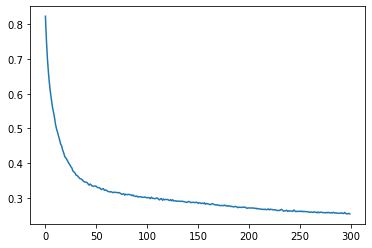

In [111]:
plt.plot(range(epochs),losses)

In [113]:
with torch.no_grad():
    y_pred=model(con_test,cat_test)
    loss=criterion(y_pred,y_test)

In [114]:
loss

tensor(0.2514)